In [1]:
import pandas as pd 
import numpy as np 
import importlib
%matplotlib notebook
import matplotlib.pyplot as plt 
import sys 
sys.path.append('/home/krish.mahajan/Documents/PythonMachineLearning/MLbook')

In [2]:
df =pd.read_csv('/home/krish.mahajan/Documents/PythonMachineLearning/MLbook/data/iris.data',header=None) 

# select setosa and versicolor and assign target variable value 1 and -1 
y = df.iloc[0:100,4].values
y= np.where(y=='Iris-setosa',-1,1)  

# extract sepal length and petal length 
X = df.iloc[0:100,[0,2]].values

In [3]:
X.shape , y.shape 

((100, 2), (100,))

In [4]:
from algorithm import adaline_bgd 
importlib.reload(adaline_bgd) 

<module 'algorithm.adaline_bgd' from '/home/krish.mahajan/Documents/PythonMachineLearning/MLbook/algorithm/adaline_bgd.py'>

<IPython.core.display.Javascript object>


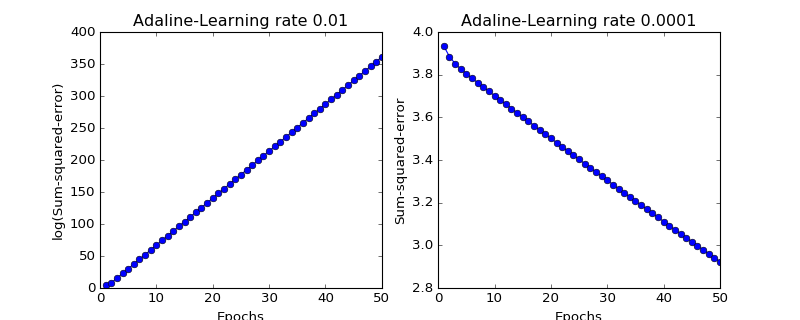

In [5]:
fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(10,4))  

ada1= adaline_bgd.AdalineGD(n_iter=50,eta=0.01).fit(X,y)  

ax[0].plot(range(1,len(ada1.cost_)+1) ,np.log(ada1.cost_) ,marker ='o') 
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)') 
ax[0].set_title('Adaline-Learning rate 0.01')  


ada2 = adaline_bgd.AdalineGD(n_iter=50,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1) ,np.log(ada2.cost_) ,marker ='o') 
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error') 
ax[1].set_title('Adaline-Learning rate 0.0001')  

plt.show()


In [6]:
# Imporving gradient descent through feature scaling
X_std =np.copy(X)
X_std[:,0] = (X[:,0] -X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] -X[:,1].mean())/X[:,1].std()

<IPython.core.display.Javascript object>


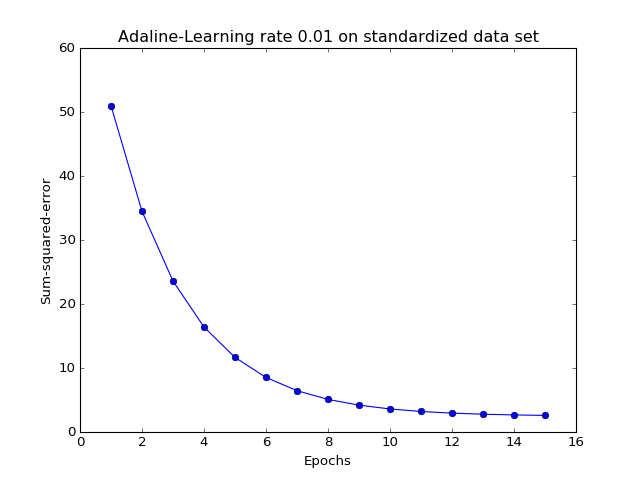

In [7]:
ada = adaline_bgd.AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y) 
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error') 
plt.title('Adaline-Learning rate 0.01 on standardized data set')  
plt.show()